In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

Imported the necessary library for EDA and Split process.

In [2]:
df_wine=pd.read_csv("winequality-red.csv")

In [3]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Here the Wine_Equality dataset is loaded.

In [4]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This shows that all the columns are numerical values and total number of datas are 1599

In [6]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This tells us that there is no null value present in the taken dataset.

In [7]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This provides us the statistical values of the dataset.

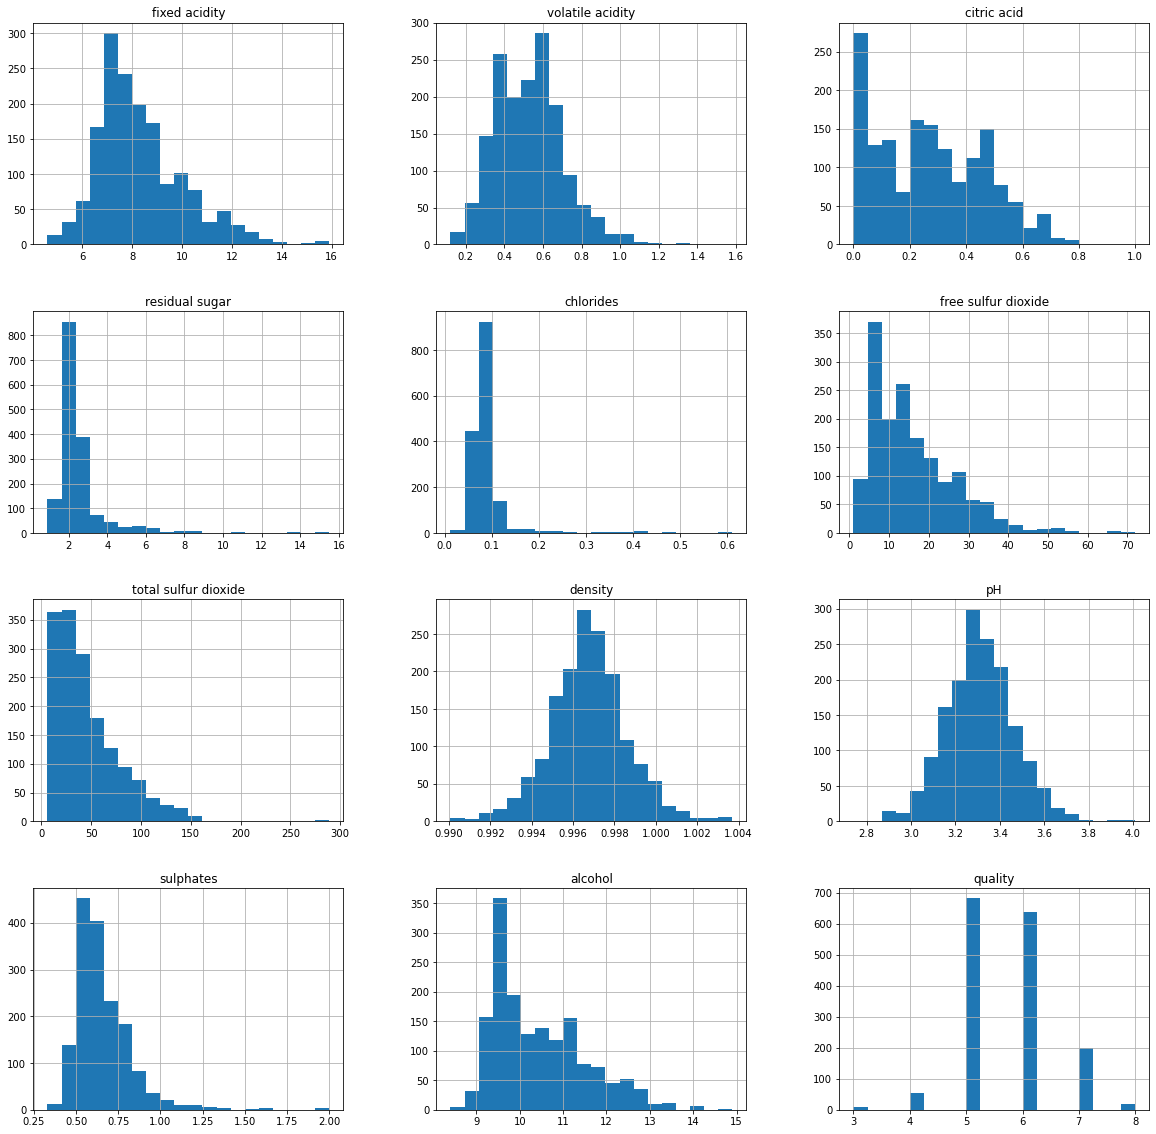

In [8]:
df_wine.hist(bins=20,figsize=(20,20))
plt.show()

from the histogram plot we can come to a conclusion that skewness are present in certain columns and either it may be positive or negative skewness.

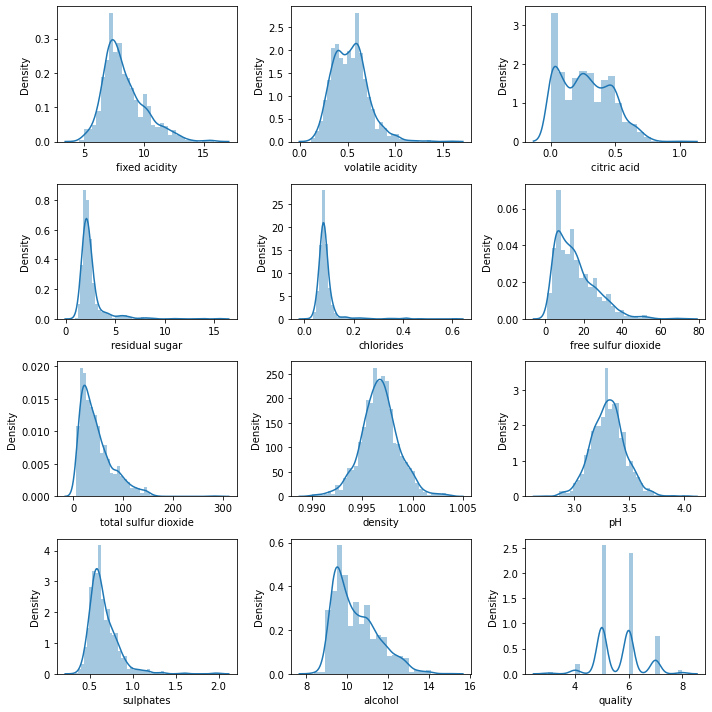

In [9]:
plt.figure(figsize=(10,10))
pltnumber=1

for clmns in df_wine:
    if pltnumber<=12:
        ax=plt.subplot(4,3,pltnumber)
        sns.distplot(df_wine[clmns])
        plt.xlabel(clmns,fontsize=10)
        pltnumber+=1
plt.tight_layout()

This clearly shows that apart from density and pH columns rest of the columns has skewness and some outliers will be present which cause the skewness in the data.

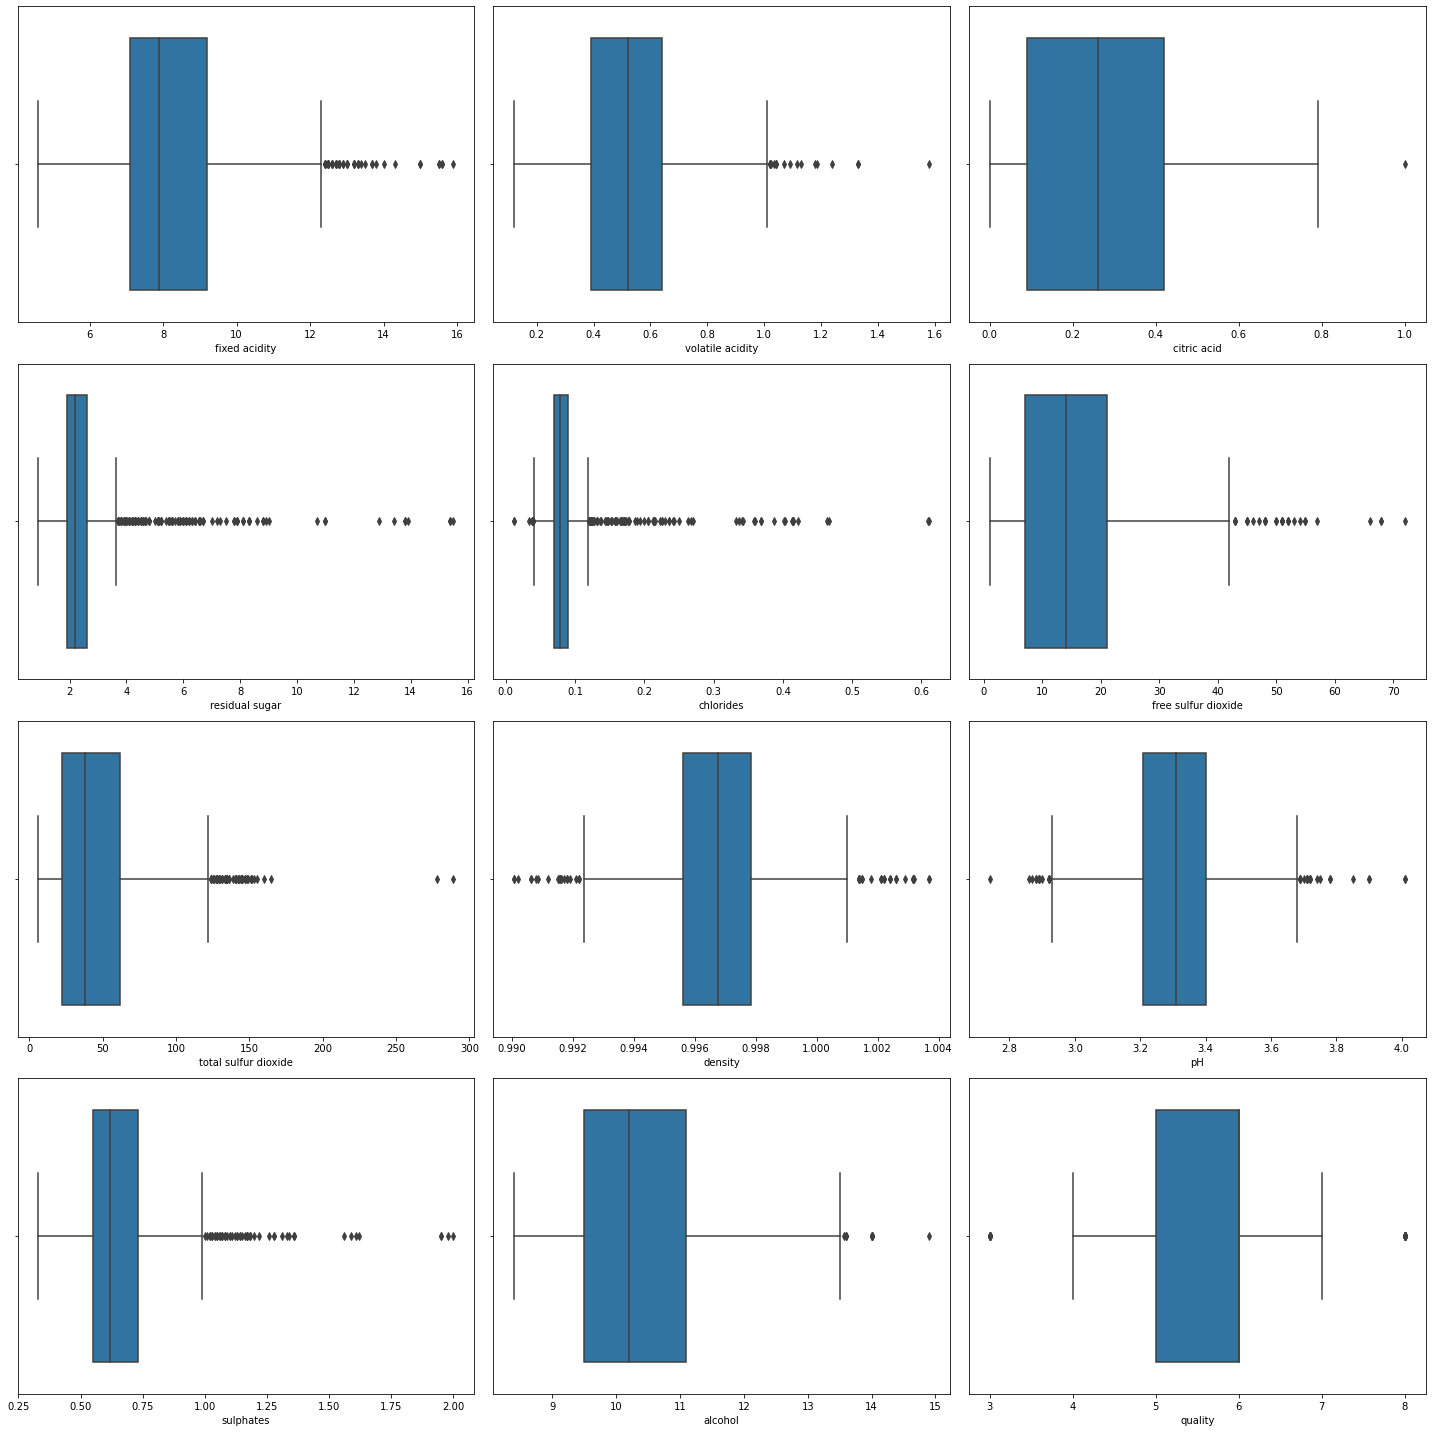

In [10]:
plt.figure(figsize=(20,20))
pltnumber=1
for clmns in df_wine:
    if pltnumber<=12:
        ax=plt.subplot(4,3,pltnumber)
        sns.boxplot(df_wine[clmns])
        plt.xlabel(clmns,fontsize=10)
        pltnumber+=1
        plt.tight_layout()

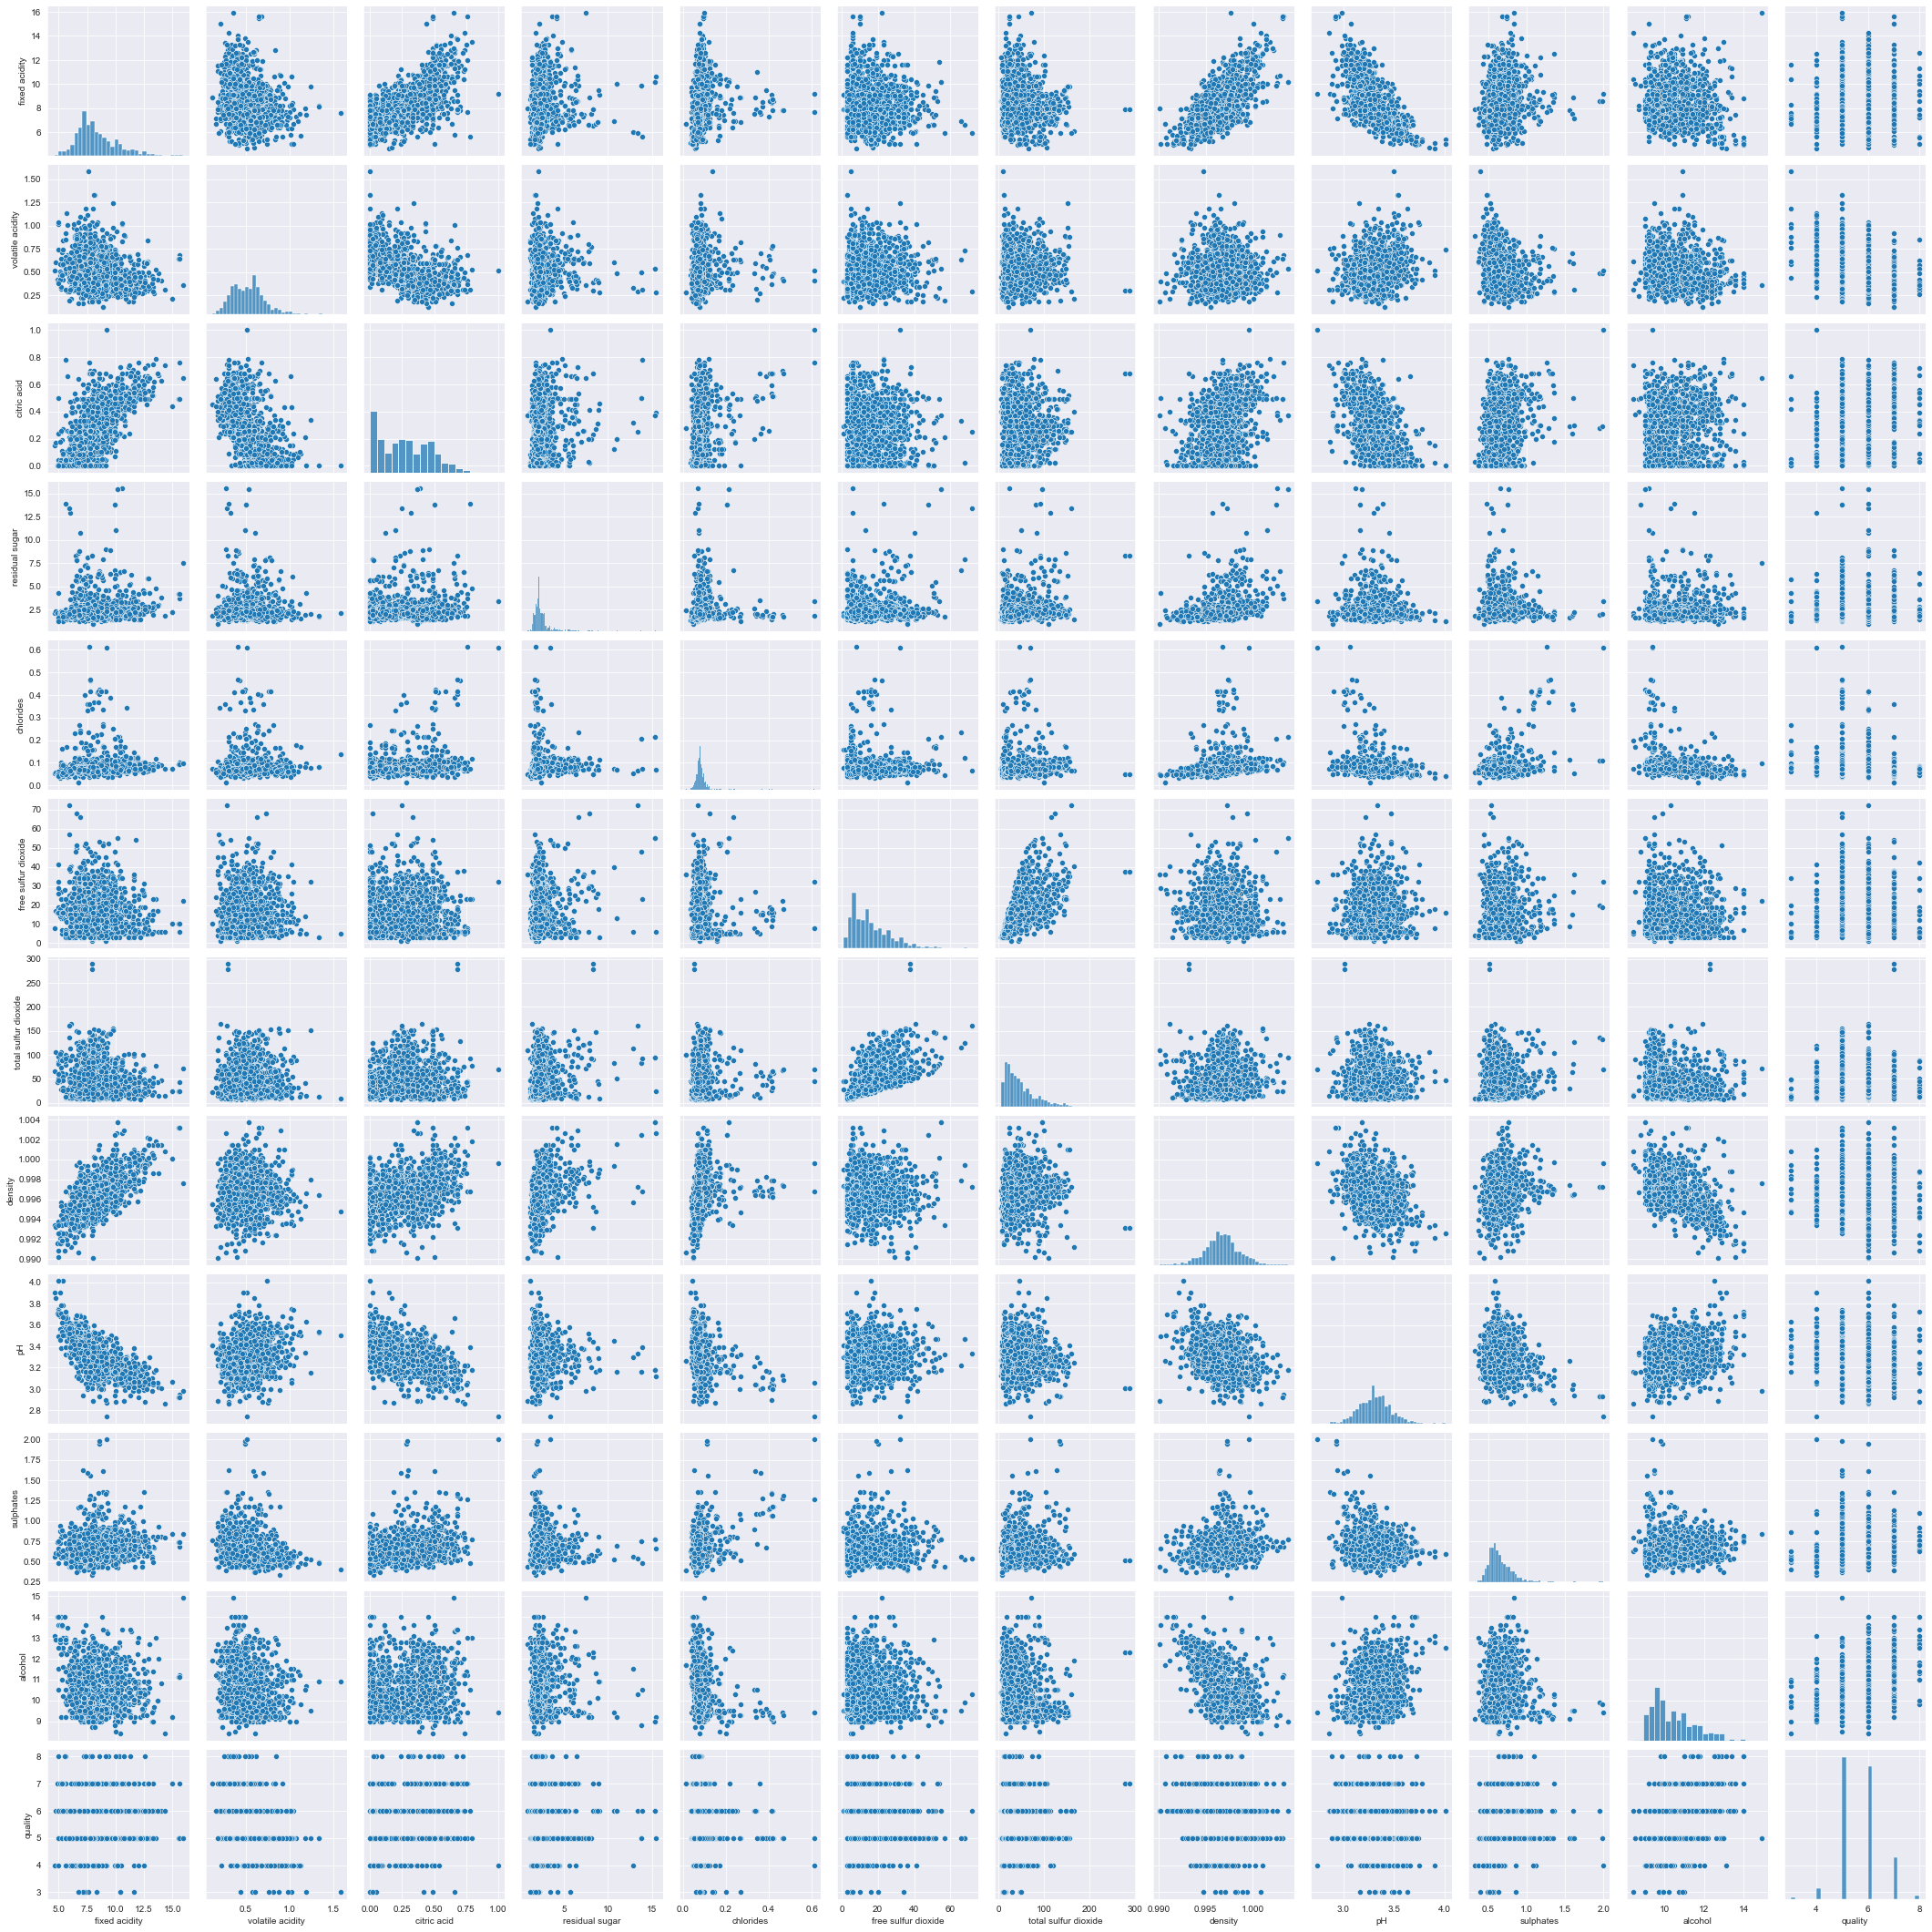

In [139]:
# Pair Plot:
sns.pairplot(df_wine)
plt.show()

In [11]:
df_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We can see that there are skewness present in certain columns they are out of the range -0.5 to 0.5

In [12]:
from sklearn.preprocessing import power_transform
df_wineNew=power_transform(df_wine,method='yeo-johnson')
df_wineNew=pd.DataFrame(df_wineNew,columns=df_wine.columns)

In [13]:
df_wineNew.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
quality                 0.012134
dtype: float64

Here i have removed the skewness by using 'yeo-johnson' method. and now we can see that all the columns are in range -0.5 to 0.5

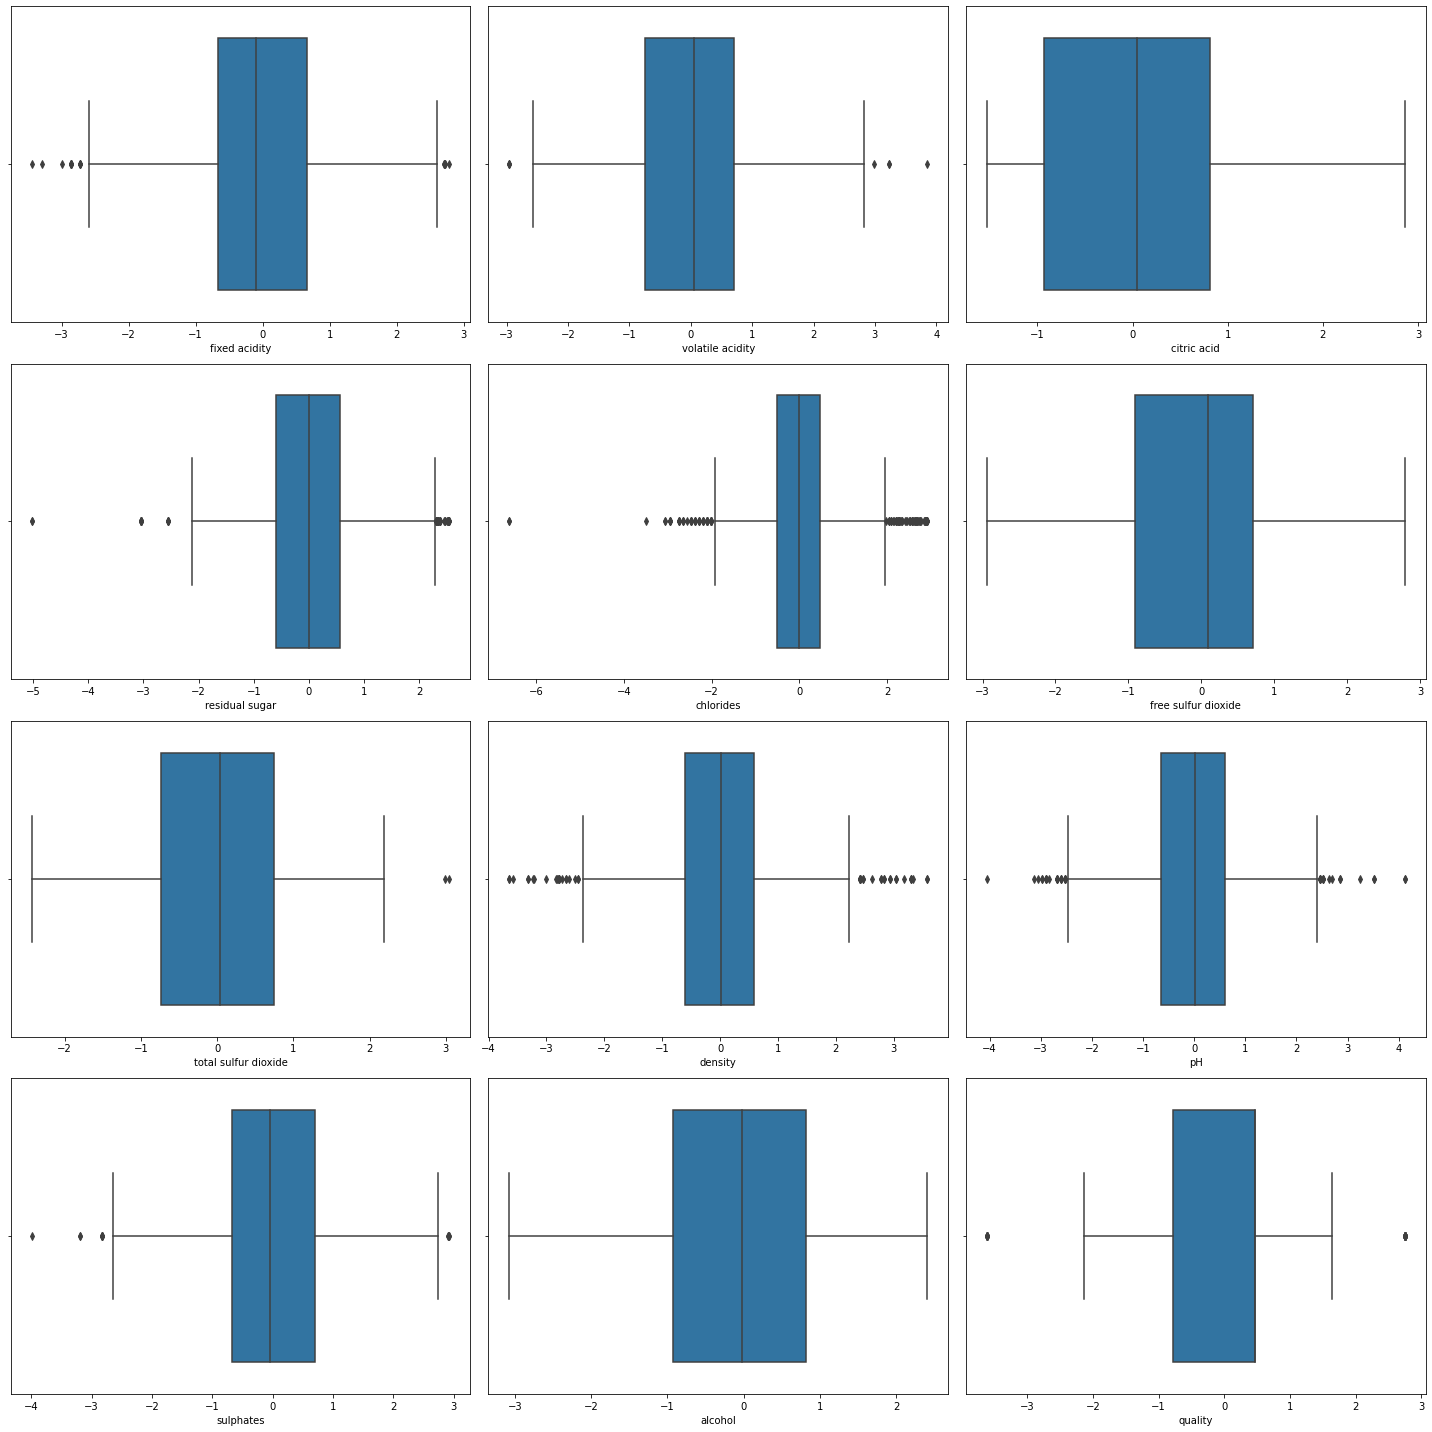

In [14]:
plt.figure(figsize=(20,20))
pltnumber=1
for clmns in df_wine:
    if pltnumber<=12:
        ax=plt.subplot(4,3,pltnumber)
        sns.boxplot(df_wineNew[clmns])
        plt.xlabel(clmns,fontsize=10)
        pltnumber+=1
        plt.tight_layout()

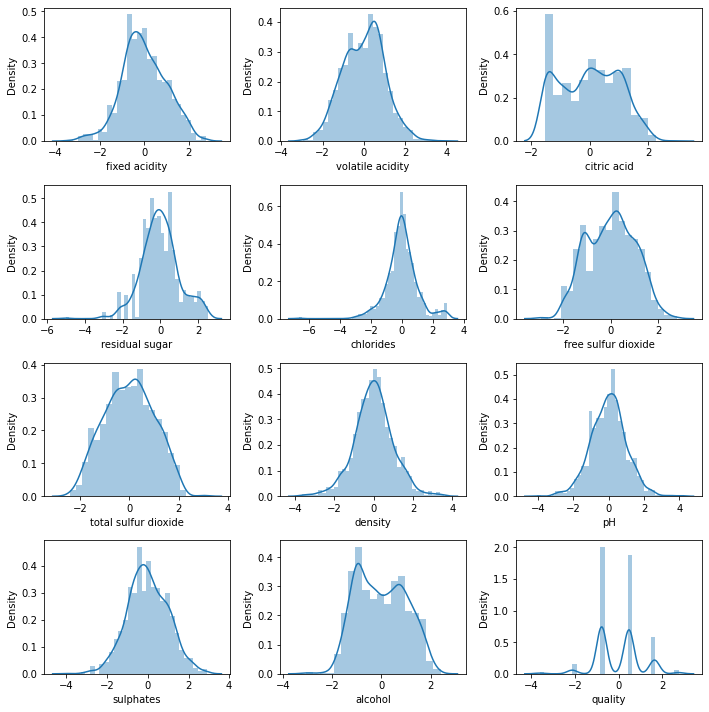

In [15]:
plt.figure(figsize=(10,10))
pltnumber=1

for clmns in df_wine:
    if pltnumber<=12:
        ax=plt.subplot(4,3,pltnumber)
        sns.distplot(df_wineNew[clmns])
        plt.xlabel(clmns,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Here we can see that somewhat all the datas in the columns are normalized. and we can see a bell curve.

In [16]:
# Remove the outliers:
from scipy.stats import zscore
z=np.abs(zscore(df_wineNew))
z

array([[4.42665887e-01, 9.95541630e-01, 1.53110932e+00, ...,
        5.81649810e-01, 1.07502541e+00, 7.77467217e-01],
       [1.61307687e-01, 1.77129873e+00, 1.53110932e+00, ...,
        3.95139954e-01, 5.00859609e-01, 7.77467217e-01],
       [1.61307687e-01, 1.26980139e+00, 1.25535866e+00, ...,
        1.83771552e-01, 5.00859609e-01, 7.77467217e-01],
       ...,
       [1.36436736e+00, 3.87065014e-04, 6.83293826e-01, ...,
        8.20841495e-01, 7.34557526e-01, 4.73370362e-01],
       [1.76745837e+00, 7.28552770e-01, 7.43826364e-01, ...,
        5.88343819e-01, 1.87998601e-02, 7.77467217e-01],
       [1.66263981e+00, 1.32045850e+00, 1.03107021e+00, ...,
        2.56369273e-01, 7.34557526e-01, 4.73370362e-01]])

In [17]:
threshold=3
print((np.where(z>3)))

(array([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  459,  469,  480,  517,  517,  544,  544,  554,  555,  557,
        608,  614,  690,  695,  695,  797,  832,  836,  836,  837,  837,
        889,  899,  909,  914, 1017, 1017, 1018, 1018, 1081, 1114, 1269,
       1270, 1287, 1299, 1299, 1316, 1316, 1321, 1321, 1369, 1374, 1374,
       1434, 1435, 1469, 1478, 1505, 1571], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  7, 11,  3,  7, 10, 11,
        8, 10,  7,  7,  7,  7,  8, 11,  4,  8,  4, 11,  4,  7,  4,  7,  7,
       11,  3,  3,  3,  7,  3,  7,  6,  7,  7,  7,  9,  1, 11,  3,  8,  3,
        8,  9,  3, 11,  7,  7, 11, 11, 11,  4], dtype=int64))


In [18]:
print(len(np.where(z>3)))

2


In [19]:
dfNew_wine=df_wineNew[(z<3).all(axis=1)]

In [20]:

print("Shape before".ljust(20),":",df_wineNew.shape)
print("Shape After".ljust(20),":",dfNew_wine.shape)
print("%loss".ljust(20),":",((df_wineNew.shape[0]-dfNew_wine.shape[0])/df_wineNew.shape[0]))

Shape before         : (1599, 12)
Shape After          : (1551, 12)
%loss                : 0.0300187617260788


Here it shows how many outliers are removed from the dataset and i also shown that percentage of loss

In [21]:
print(dfNew_wine['quality'].unique())
print(df_wine['quality'].unique())

[-0.77746722  0.47337036  1.64338482 -2.1298442   2.74703901]
[5 6 7 4 8 3]


Now we can see that in our Skewed removed dataset the dependanent column that is our output column "quality" has negative values so now we can take the dataset which we used before removing the skewness and we can remove the outliers and convert the quality column to 0 and 1 based on the grade.

In [22]:
# Remove the outliers:
from scipy.stats import zscore
z=np.abs(zscore(df_wine))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [23]:
threshold=3
print((np.where(z>3)))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [24]:
dfNew1_wine=df_wine[(z<3).all(axis=1)]

In [25]:
print("Shape before".ljust(20),":",df_wine.shape)
print("Shape After".ljust(20),":",dfNew1_wine.shape)
print("%loss".ljust(20),":",((df_wine.shape[0]-dfNew1_wine.shape[0])/df_wine.shape[0]))

Shape before         : (1599, 12)
Shape After          : (1451, 12)
%loss                : 0.09255784865540963


So according to our calculations we have no removerd outliers data and the loss of data is 9%

In [26]:
x=dfNew1_wine.drop('quality',axis=1)

In [27]:
dfNew1_wine['quality'].unique()

array([5, 6, 7, 4, 8], dtype=int64)

Here we can se that the quality varies from 5 to 8 and we can assume that 8 is higgest quality wine and 4 is the least quality one.

In [28]:
dfNew1_wine['quality']=[1 if out >=7 else 0 for out in dfNew1_wine['quality']]

Here i have now set the 7 as the parameter for quality check , if the quality is equal or greater than 7 then make it 1 or else 0.

In [29]:
dfNew1_wine['quality'].unique()

array([0, 1], dtype=int64)

In [30]:
y=dfNew1_wine['quality']

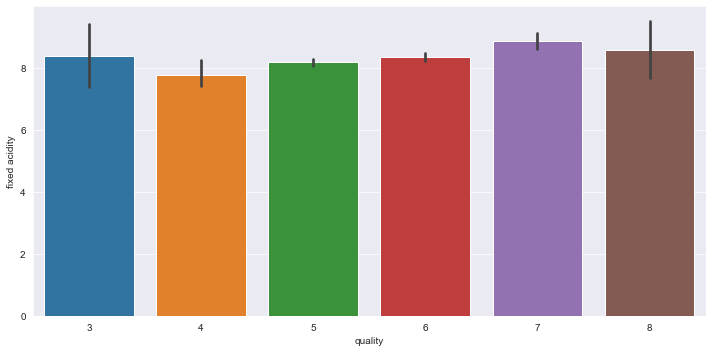

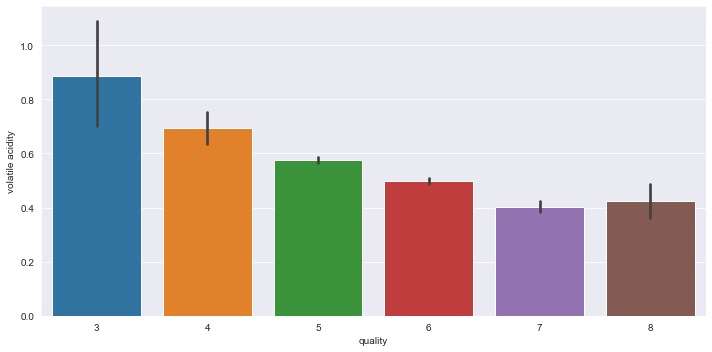

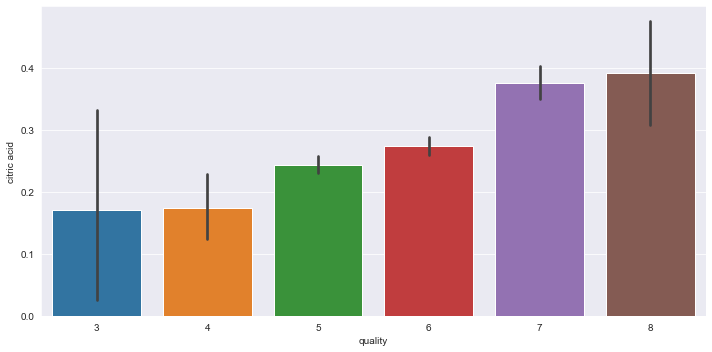

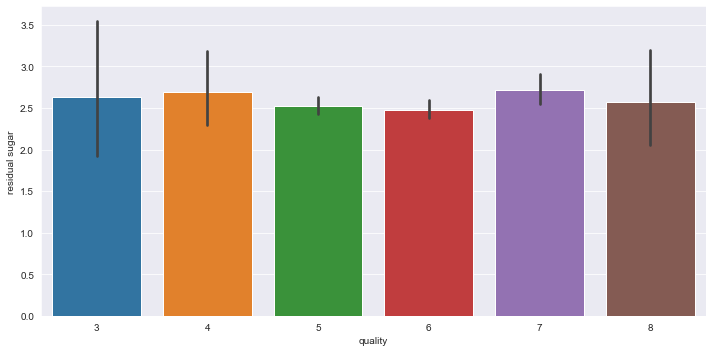

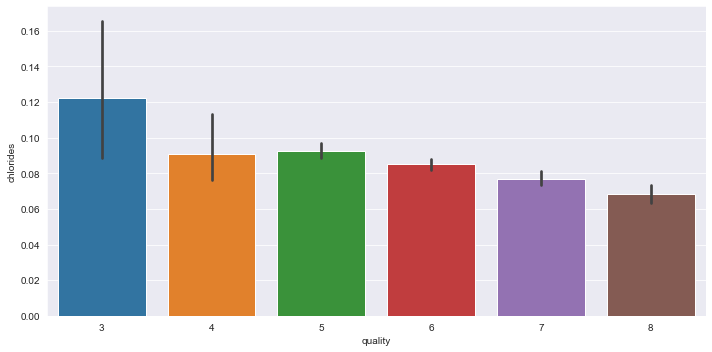

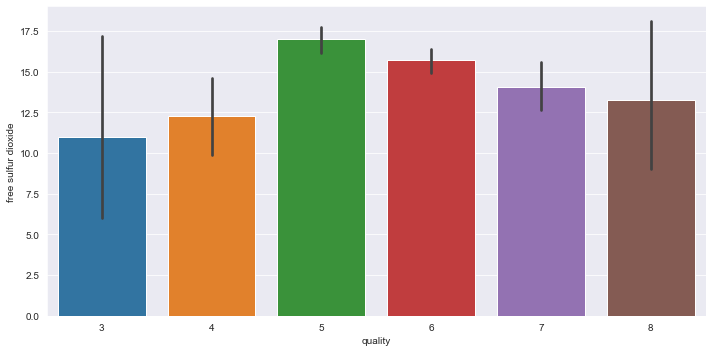

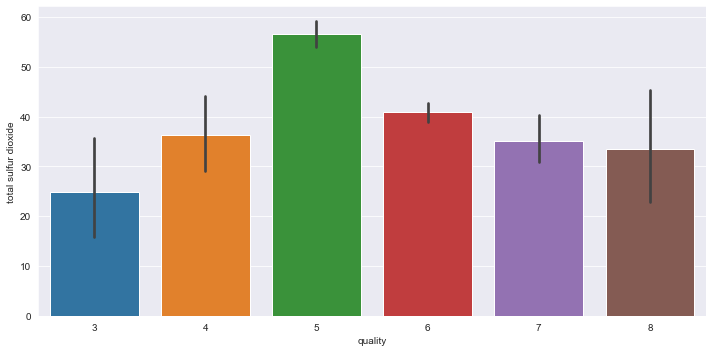

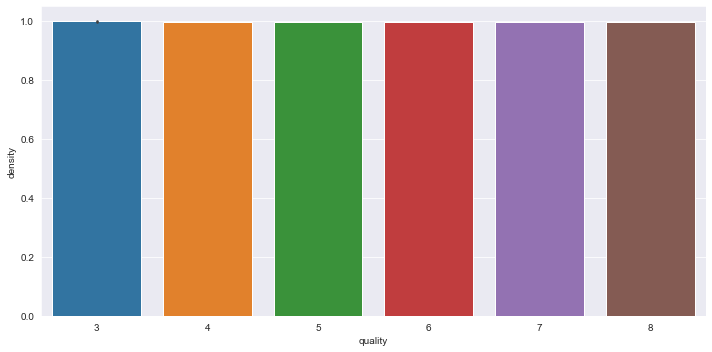

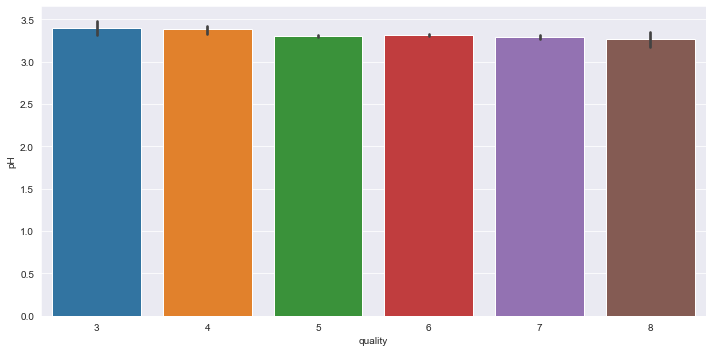

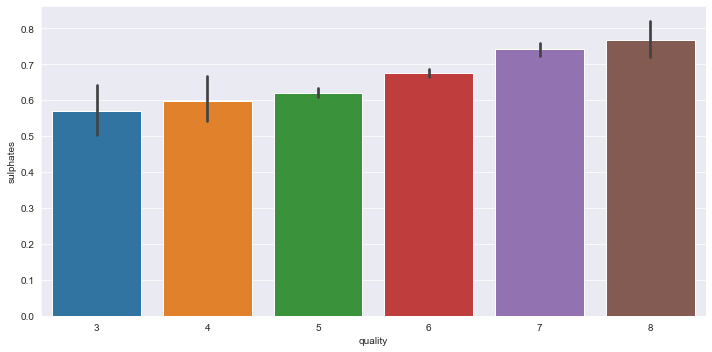

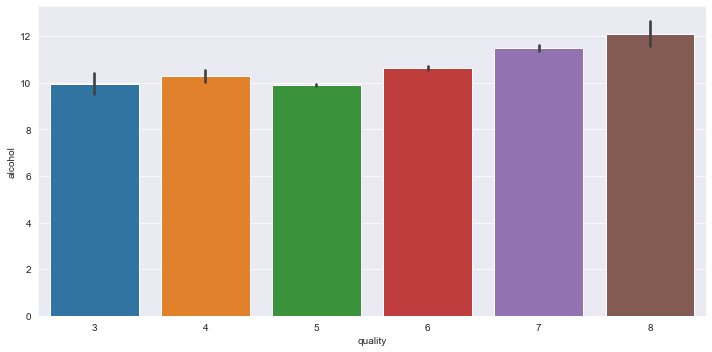

In [31]:
count= x.columns.values
sns.set_style("darkgrid")
for i in count:
    plt.figure(figsize=(10,5))
    sns.barplot(x='quality',y=i,data=df_wine)
    plt.tight_layout()

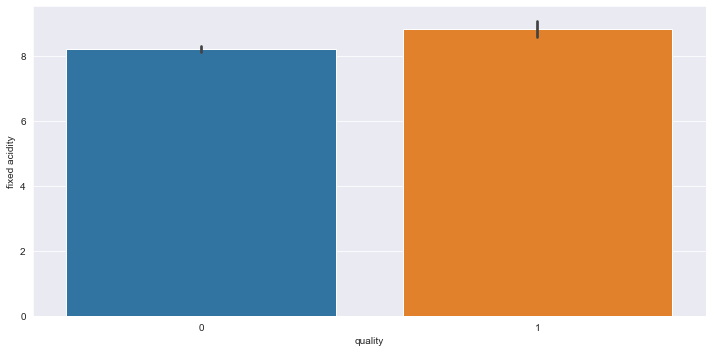

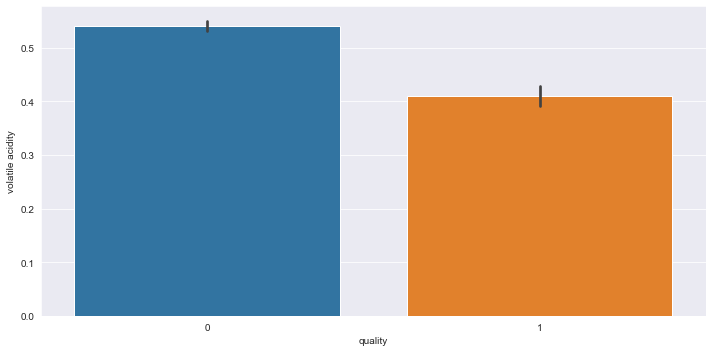

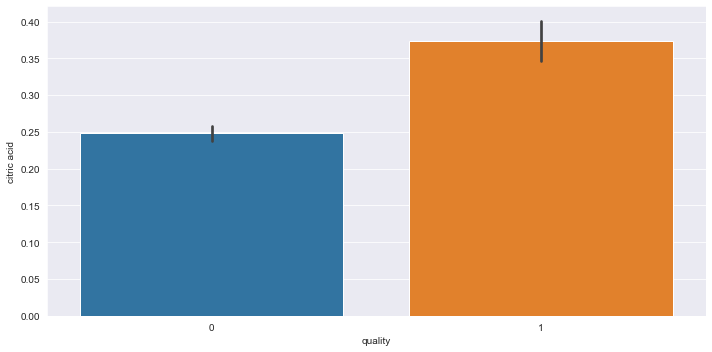

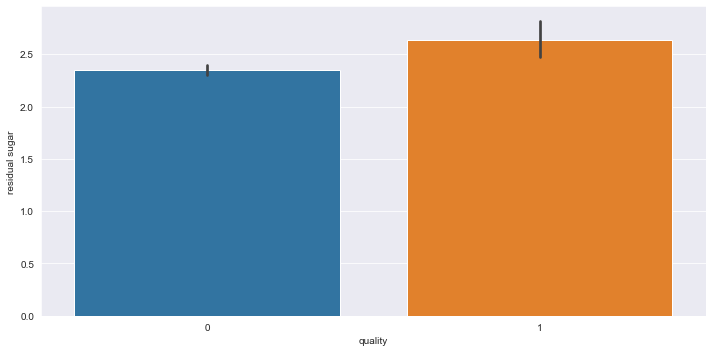

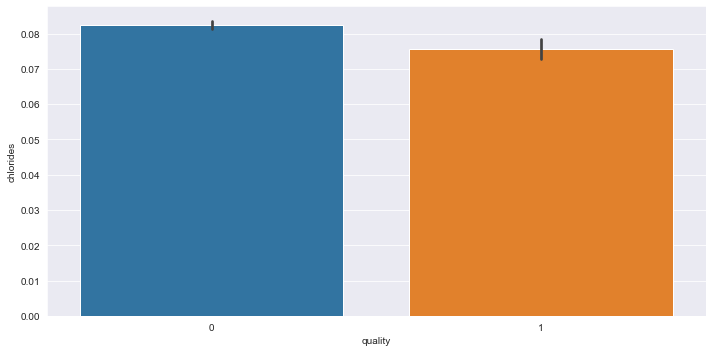

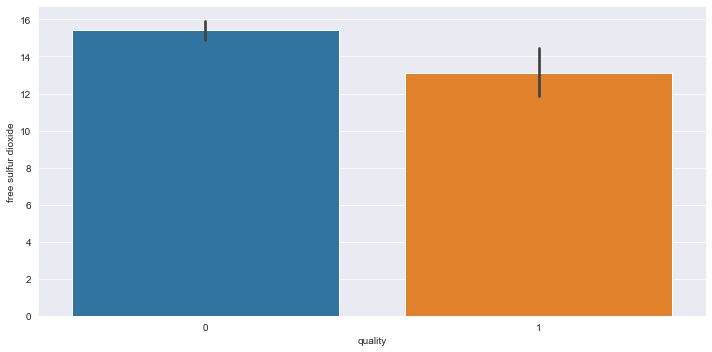

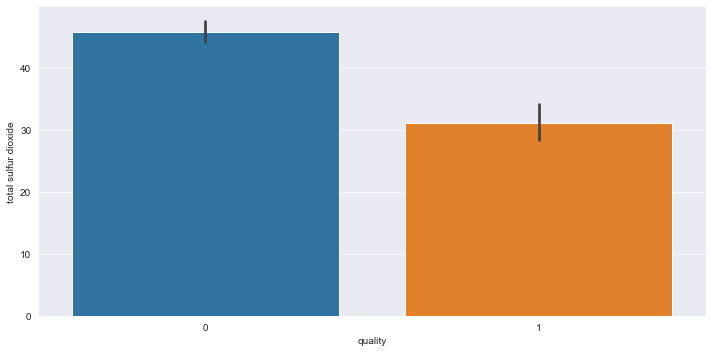

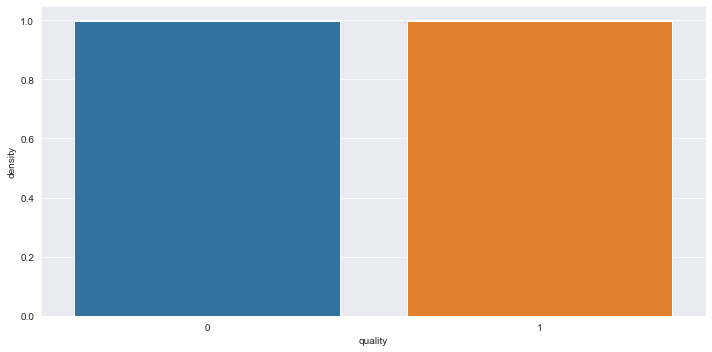

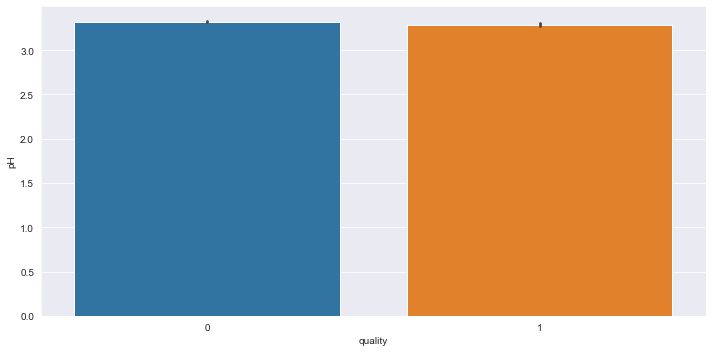

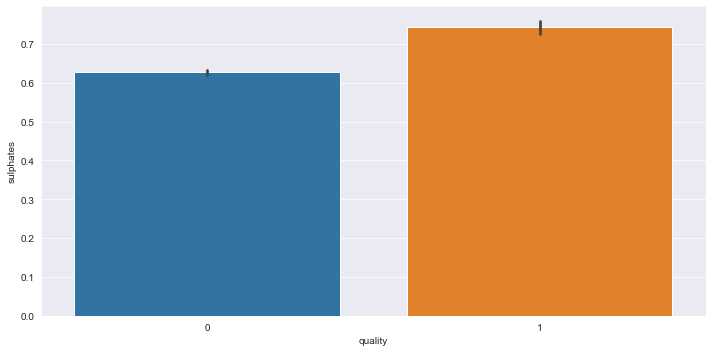

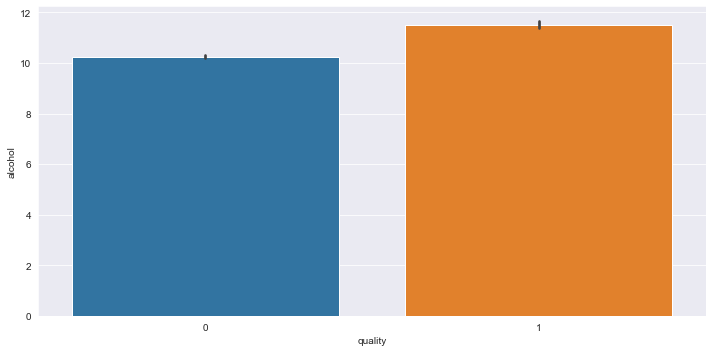

In [32]:
count= x.columns.values
sns.set_style("darkgrid")
for i in count:
    plt.figure(figsize=(10,5))
    sns.barplot(x='quality',y=i,data=dfNew1_wine)
    plt.tight_layout()

Here we can see how each input affects the quality .

In [33]:
corr_wine=dfNew1_wine.corr()
corr_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.310432


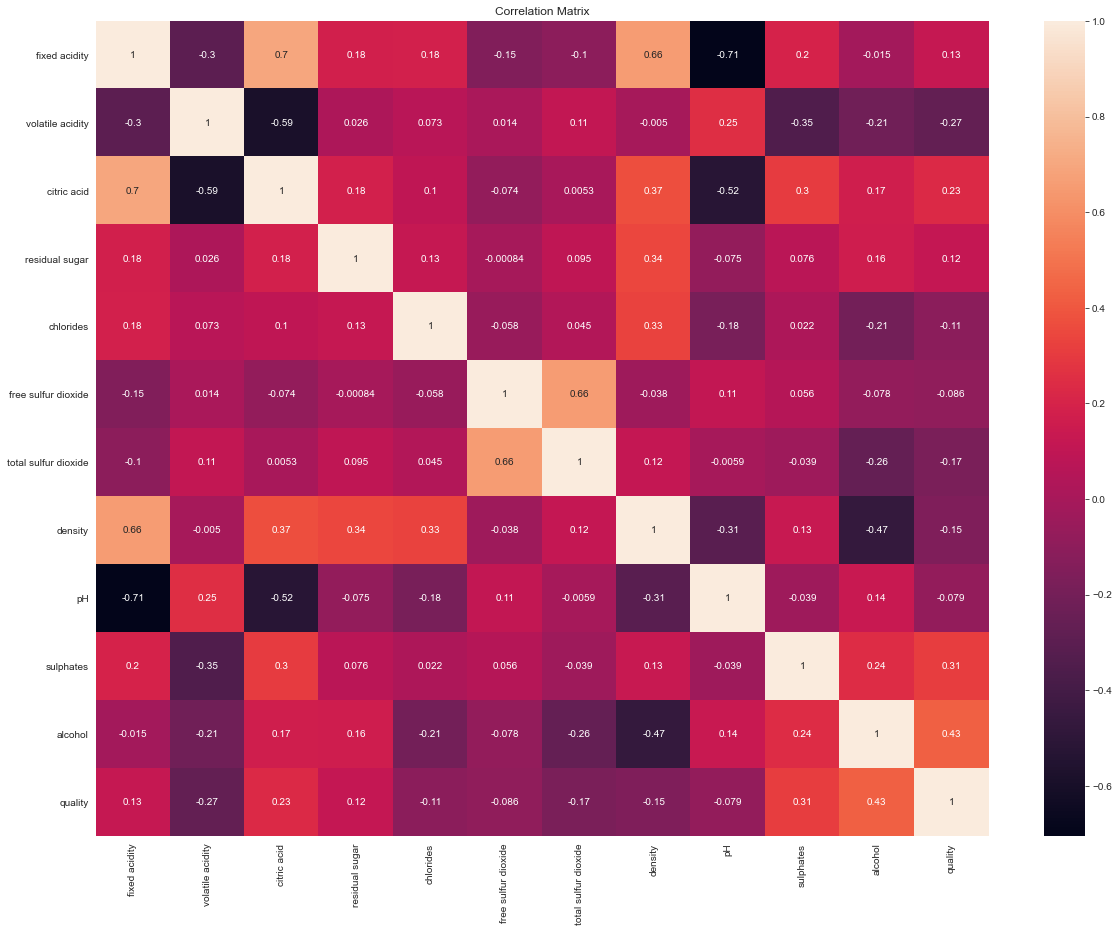

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_wine,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [35]:
y.value_counts()

0    1250
1     201
Name: quality, dtype: int64

Here we can see that good quality wine are lesser in count comparied to poor quality wine.

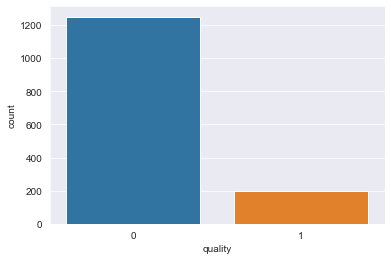

In [36]:
sns.countplot(dfNew1_wine['quality'])
plt.show()

Now for our model purpose we have to balance the above data . both 1 and 0 should have same count of records.

In [37]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)

In [39]:
y_over.value_counts()

0    1250
1    1250
Name: quality, dtype: int64

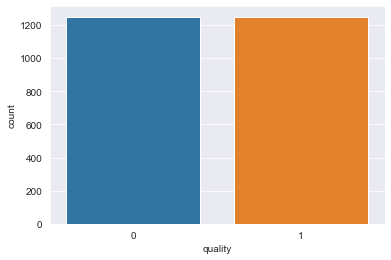

In [40]:
sns.countplot(y_over)
plt.show()

In [41]:
scaler=StandardScaler()
x_sc=scaler.fit_transform(x_over)

Here i have standardized the data for modelling purpose. 

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y_over,test_size = 0.25, random_state = 45)

In [43]:
print("x_train".ljust(10),":",x_train.shape)
print("x_test".ljust(10),":",x_test.shape)
print("y_train".ljust(10),":",y_train.shape)
print("y_test".ljust(10),":",y_test.shape)

x_train    : (1875, 11)
x_test     : (625, 11)
y_train    : (1875,)
y_test     : (625,)


#### ML Model Building:

#### Support Vector Classifier:

In [117]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print("Accuracy Score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy Score 
 0.9008
Confusion Matrix 
 [[279  43]
 [ 19 284]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       322
           1       0.87      0.94      0.90       303

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625

ROC AUC Score 
 0.901876678351065


#### Decision Tree Classifier:

In [106]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuarcy Score \n",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred_dt))
print("Classification Report \n",classification_report(y_test,y_pred_dt))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred_dt))

Accuarcy Score 
 0.9136
Confusion Matrix 
 [[288  34]
 [ 20 283]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       322
           1       0.89      0.93      0.91       303

    accuracy                           0.91       625
   macro avg       0.91      0.91      0.91       625
weighted avg       0.91      0.91      0.91       625

ROC AUC Score 
 0.9142016686140664


#### Random Forest Classifier:

In [118]:
from sklearn.ensemble import RandomForestClassifier 

rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rf=rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred_rf))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred_rf))
print("Classification Report \n", classification_report(y_test,y_pred_rf))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred_rf))

Accuracy score 
 0.9408
Confusion Matrix 
 [[297  25]
 [ 12 291]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       322
           1       0.92      0.96      0.94       303

    accuracy                           0.94       625
   macro avg       0.94      0.94      0.94       625
weighted avg       0.94      0.94      0.94       625

ROC AUC Score 
 0.9413781440255826


####  Ada Boost Classifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred_ad=abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred_ad))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred_ad))
print("Classification Report \n", classification_report(y_test,y_pred_ad))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred_ad))

Accuracy score 
 0.8528
Confusion Matrix 
 [[273  49]
 [ 43 260]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       322
           1       0.84      0.86      0.85       303

    accuracy                           0.85       625
   macro avg       0.85      0.85      0.85       625
weighted avg       0.85      0.85      0.85       625

ROC AUC Score 
 0.8529559477686899


#### Gradiant Boost Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred_gb=gbc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred_gb))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred_gb))
print("Classification Report \n", classification_report(y_test,y_pred_gb))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred_gb))

Accuracy score 
 0.912
Confusion Matrix 
 [[285  37]
 [ 18 285]]
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       322
           1       0.89      0.94      0.91       303

    accuracy                           0.91       625
   macro avg       0.91      0.91      0.91       625
weighted avg       0.91      0.91      0.91       625

ROC AUC Score 
 0.912843613553902


#### Bagging Classifier

In [121]:
from sklearn.ensemble import BaggingClassifier

bc=BaggingClassifier()
bc.fit(x_train,y_train)
y_pred_bc=bc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred_bc))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred_bc))
print("Classification Report \n", classification_report(y_test,y_pred_bc))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred_bc))

Accuracy score 
 0.9296
Confusion Matrix 
 [[301  21]
 [ 23 280]]
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       322
           1       0.93      0.92      0.93       303

    accuracy                           0.93       625
   macro avg       0.93      0.93      0.93       625
weighted avg       0.93      0.93      0.93       625

ROC AUC Score 
 0.9294375089682883


#### ROC AUC CURVE for all the Model

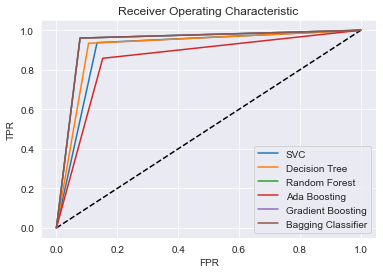

In [123]:
# Support Vector Classifier:
y_pred_prob1=svm.predict(x_test)
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred_prob1)

#Decision Tree Classifier
y_pred_prob2= dt.predict(x_test)
fpr2,tpr2,threshold2=roc_curve(y_test,y_pred_prob2)

#Random Forest Classifer: 
y_pred_prob3=rfc.predict(x_test)
fpr3,tpr3,threshold3=roc_curve(y_test,y_pred_prob3)

#Ada Boosting Classifier: abc
y_pred_prob4=abc.predict(x_test)
fpr4,tpr4,threshold4=roc_curve(y_test,y_pred_prob4)

#Gradient Boosting Classifier: gbc
y_pred_prob5=rfc.predict(x_test)
fpr5,tpr5,threshold5=roc_curve(y_test,y_pred_prob5)

#Bagging Classifier: Bc
y_pred_prob6=rfc.predict(x_test)
fpr6,tpr6,threshold6=roc_curve(y_test,y_pred_prob6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1,tpr1,label="SVC")
plt.plot(fpr2,tpr2,label="Decision Tree")
plt.plot(fpr3,tpr3,label="Random Forest")
plt.plot(fpr4,tpr4,label="Ada Boosting")
plt.plot(fpr5,tpr5,label="Gradient Boosting")
plt.plot(fpr6,tpr6,label="Bagging Classifier")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()


#### Feature Importance Method 

alcohol                 0.267154
sulphates               0.161890
citric acid             0.099853
volatile acidity        0.083868
total sulfur dioxide    0.071847
density                 0.059780
fixed acidity           0.053599
chlorides               0.053596
residual sugar          0.052052
free sulfur dioxide     0.050874
pH                      0.045488
dtype: float64


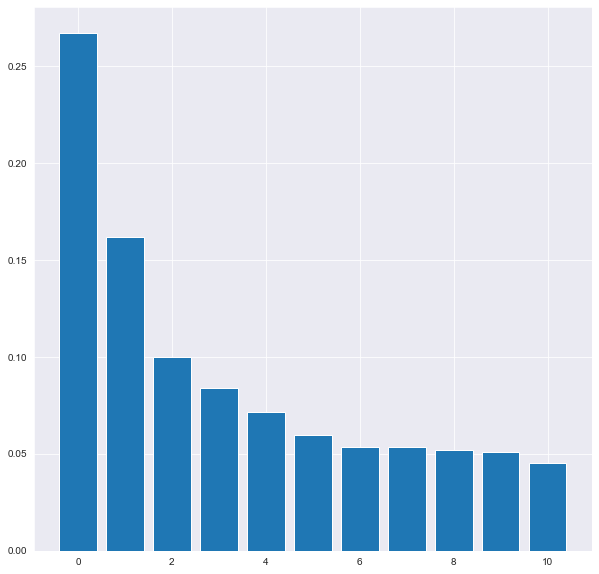

In [68]:
fea_imp=pd.Series(rfc.feature_importances_, index=x.columns)
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(fea_imp))],fea_imp.nlargest(12))
print(fea_imp.nlargest(12))
plt.show()

fixed acidity           0.12
free sulfur dioxide     0.12
sulphates               0.12
residual sugar          0.10
total sulfur dioxide    0.10
alcohol                 0.10
volatile acidity        0.08
chlorides               0.08
density                 0.08
citric acid             0.06
pH                      0.04
dtype: float64


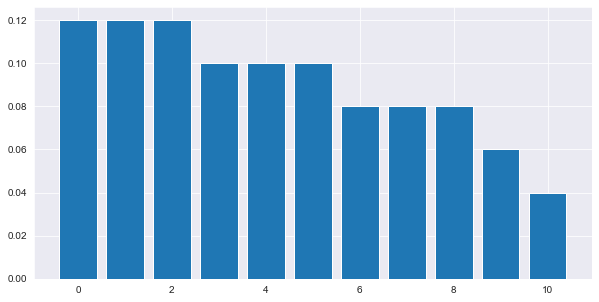

In [79]:
# For AdaBosstClassifier:
fea_imp_abc=pd.Series(abc.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(fea_imp_abc))],fea_imp_abc.nlargest(20))
print(fea_imp_abc.nlargest(20))
plt.show()

alcohol                 0.540002
sulphates               0.191565
total sulfur dioxide    0.066264
volatile acidity        0.047833
free sulfur dioxide     0.026243
chlorides               0.025022
residual sugar          0.024603
citric acid             0.024591
fixed acidity           0.023692
pH                      0.015289
density                 0.014897
dtype: float64


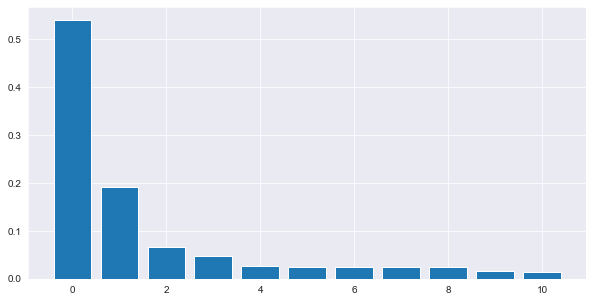

In [87]:
# For GradiantBosstClassifier:
fea_imp_gbc=pd.Series(gbc.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(fea_imp_gbc))],fea_imp_gbc.nlargest(20))
print(fea_imp_gbc.nlargest(20))
plt.show()

Top 5 Features are:

1.alcohol 
2.sulphates               
3.citric acid             
4.volatile acidity        
5.total sulfur dioxide    

Random forest classifier has high accuracy out of other models which has been built so far. Then, We will check whether model is overfitting or not using Cross Validation Score

#### Cross Validation Score

In [127]:
from sklearn.model_selection import cross_val_score

#Support Vector:
cr_svm= cross_val_score(svm,x_over,y_over,cv=5)
print("CV Score of SVM:", cr_svm.mean())
print("Accuracy Score:", accuracy_score(y_test,y_pred))
d=(accuracy_score(y_test,y_pred) - cr_svm.mean())*100
print("Difference in Score:",d)
print("\n")

# Decision Tree:
cr_dt=cross_val_score(dt,x_over,y_over,cv=5)
print("CV Score of Decission Tree:", cr_dt.mean())
print("Accuracy score:", accuracy_score(y_test,y_pred_dt))
d1=(accuracy_score(y_test,y_pred_dt) - cr_dt.mean())*100
print("Difference in Score:",d1)
print("\n")

# Random Forset:
cr_rfc=cross_val_score(rfc,x_over,y_over,cv=5)
print("CV Score of Random Forest Classifer:", cr_rfc.mean())
print("Accuracy score:", accuracy_score(y_test,y_pred_rf))
d2=(accuracy_score(y_test,y_pred_rf) - cr_rfc.mean())*100
print("Difference in Score:",d2)
print("\n")

#Ada Boost:
cr_abc=cross_val_score(abc,x_over,y_over,cv=5)
print("CV Score of Ada Boost Classifer:", cr_abc.mean())
print("Accuracy score:", accuracy_score(y_test,y_pred_ad))
d3=(accuracy_score(y_test,y_pred_ad) - cr_abc.mean())*100
print("Difference in Score:",d3)
print("\n")

#Gradiant Boost:
cr_gbc=cross_val_score(gbc,x_over,y_over,cv=5)
print("CV Score of Gradiant Boost Classifer:", cr_gbc.mean())
print("Accuracy score:", accuracy_score(y_test,y_pred_gb))
d4=(accuracy_score(y_test,y_pred_gb) - cr_gbc.mean())*100
print("Difference in Score:",d4)
print("\n")

#Bagging:
cr_bc=cross_val_score(bc,x_over,y_over,cv=5)
print("CV Score of Bagging Classifer:", cr_bc.mean())
print("Accuracy score:", accuracy_score(y_test,y_pred_bc))
d5=(accuracy_score(y_test,y_pred_bc) - cr_bc.mean())*100
print("Difference in Score:",d5)




CV Score of SVM: 0.7363999999999999
Accuracy Score: 0.9008
Difference in Score: 16.440000000000012


CV Score of Decission Tree: 0.8596
Accuracy score: 0.9136
Difference in Score: 5.399999999999993


CV Score of Random Forest Classifer: 0.9071999999999999
Accuracy score: 0.9408
Difference in Score: 3.3600000000000074


CV Score of Ada Boost Classifer: 0.8480000000000001
Accuracy score: 0.8528
Difference in Score: 0.47999999999999154


CV Score of Gradiant Boost Classifer: 0.8812000000000001
Accuracy score: 0.912
Difference in Score: 3.079999999999994


CV Score of Bagging Classifer: 0.89
Accuracy score: 0.9296
Difference in Score: 3.959999999999997


Now here i have done cross Validation for all the model and compared the Cv_score with the accuracy_score and found out hte difference between the CV_score and accuracy score. 
We know that the least difference the score that model is consider as the good model and here we can find out that Ada Boost Classifer model has least difference in score so we consider Ada Boost Classifer as good model among the others and to improve the score we use Hyperparameter Tuning 

In [128]:
param={'base_estimator':[None],
       'n_estimators':[50,60,70,80,90,100,120],
       'learning_rate':[1.0,1.2,1.4,1.6,1.8],
       'random_state':[None],
       'algorithm':['SAMME.R',],
         }

In [131]:
grid_search=GridSearchCV(abc,param_grid=param,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [1.0, 1.2, 1.4, 1.6, 1.8],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 120],
                         'random_state': [None]})

In [132]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.6,
 'n_estimators': 120,
 'random_state': None}

In [135]:
final_model=AdaBoostClassifier(base_estimator=None,learning_rate=1.6,n_estimators=120,algorithm='SAMME.R',random_state=None)

final_model.fit(x_train,y_train)
final_pred=final_model.predict(x_test)
print("Accuracy- Score:" , accuracy_score(y_test,final_pred))
print("Classification Report:" , classification_report(y_test,final_pred))
print("Confusion Matrix:",confusion_matrix(y_test,final_pred))
print("ROC AUC Score:",roc_auc_score(y_test,final_pred))

Accuracy- Score: 0.896
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.89      0.90       322
           1       0.89      0.90      0.89       303

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625

Confusion Matrix: [[287  35]
 [ 30 273]]
ROC AUC Score: 0.8961472234179939


Finally the Model score is increased to 89% or 90% after appliying Hyper Parameter Tuning

#### Saving the Model:

In [137]:
import pickle
filename='WineQuality.pkl'
pickle.dump(final_model,open(filename,'wb'))

####  Loading the model 

In [138]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

89.60000000000001
